In [9]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import numpy as np
import seaborn as sn
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import PolynomialFeatures

Read the dataset

In [13]:
dataset = pd.read_csv('/Users/albertopinheira/Library/Application Support/JetBrains/DataSpell2021.3/projects/WTCCC_Works/table_study_cases_control_with_new_controls.csv')

In [14]:
copy = dataset
copy['cohort'] = copy['cohort'].map({'case': 1 ,'control': 0})
dummy_dataset = copy.drop(columns=['patient', 'Age', 'Region', 'Gender'])
dummy_dataset = pd.get_dummies(dummy_dataset)

In [15]:
dummy_dataset_case = dummy_dataset[(dummy_dataset['cohort'] == 0)]
dummy_dataset_control = dummy_dataset[dummy_dataset['cohort'] == 1]

Load Pearson correlation matrix

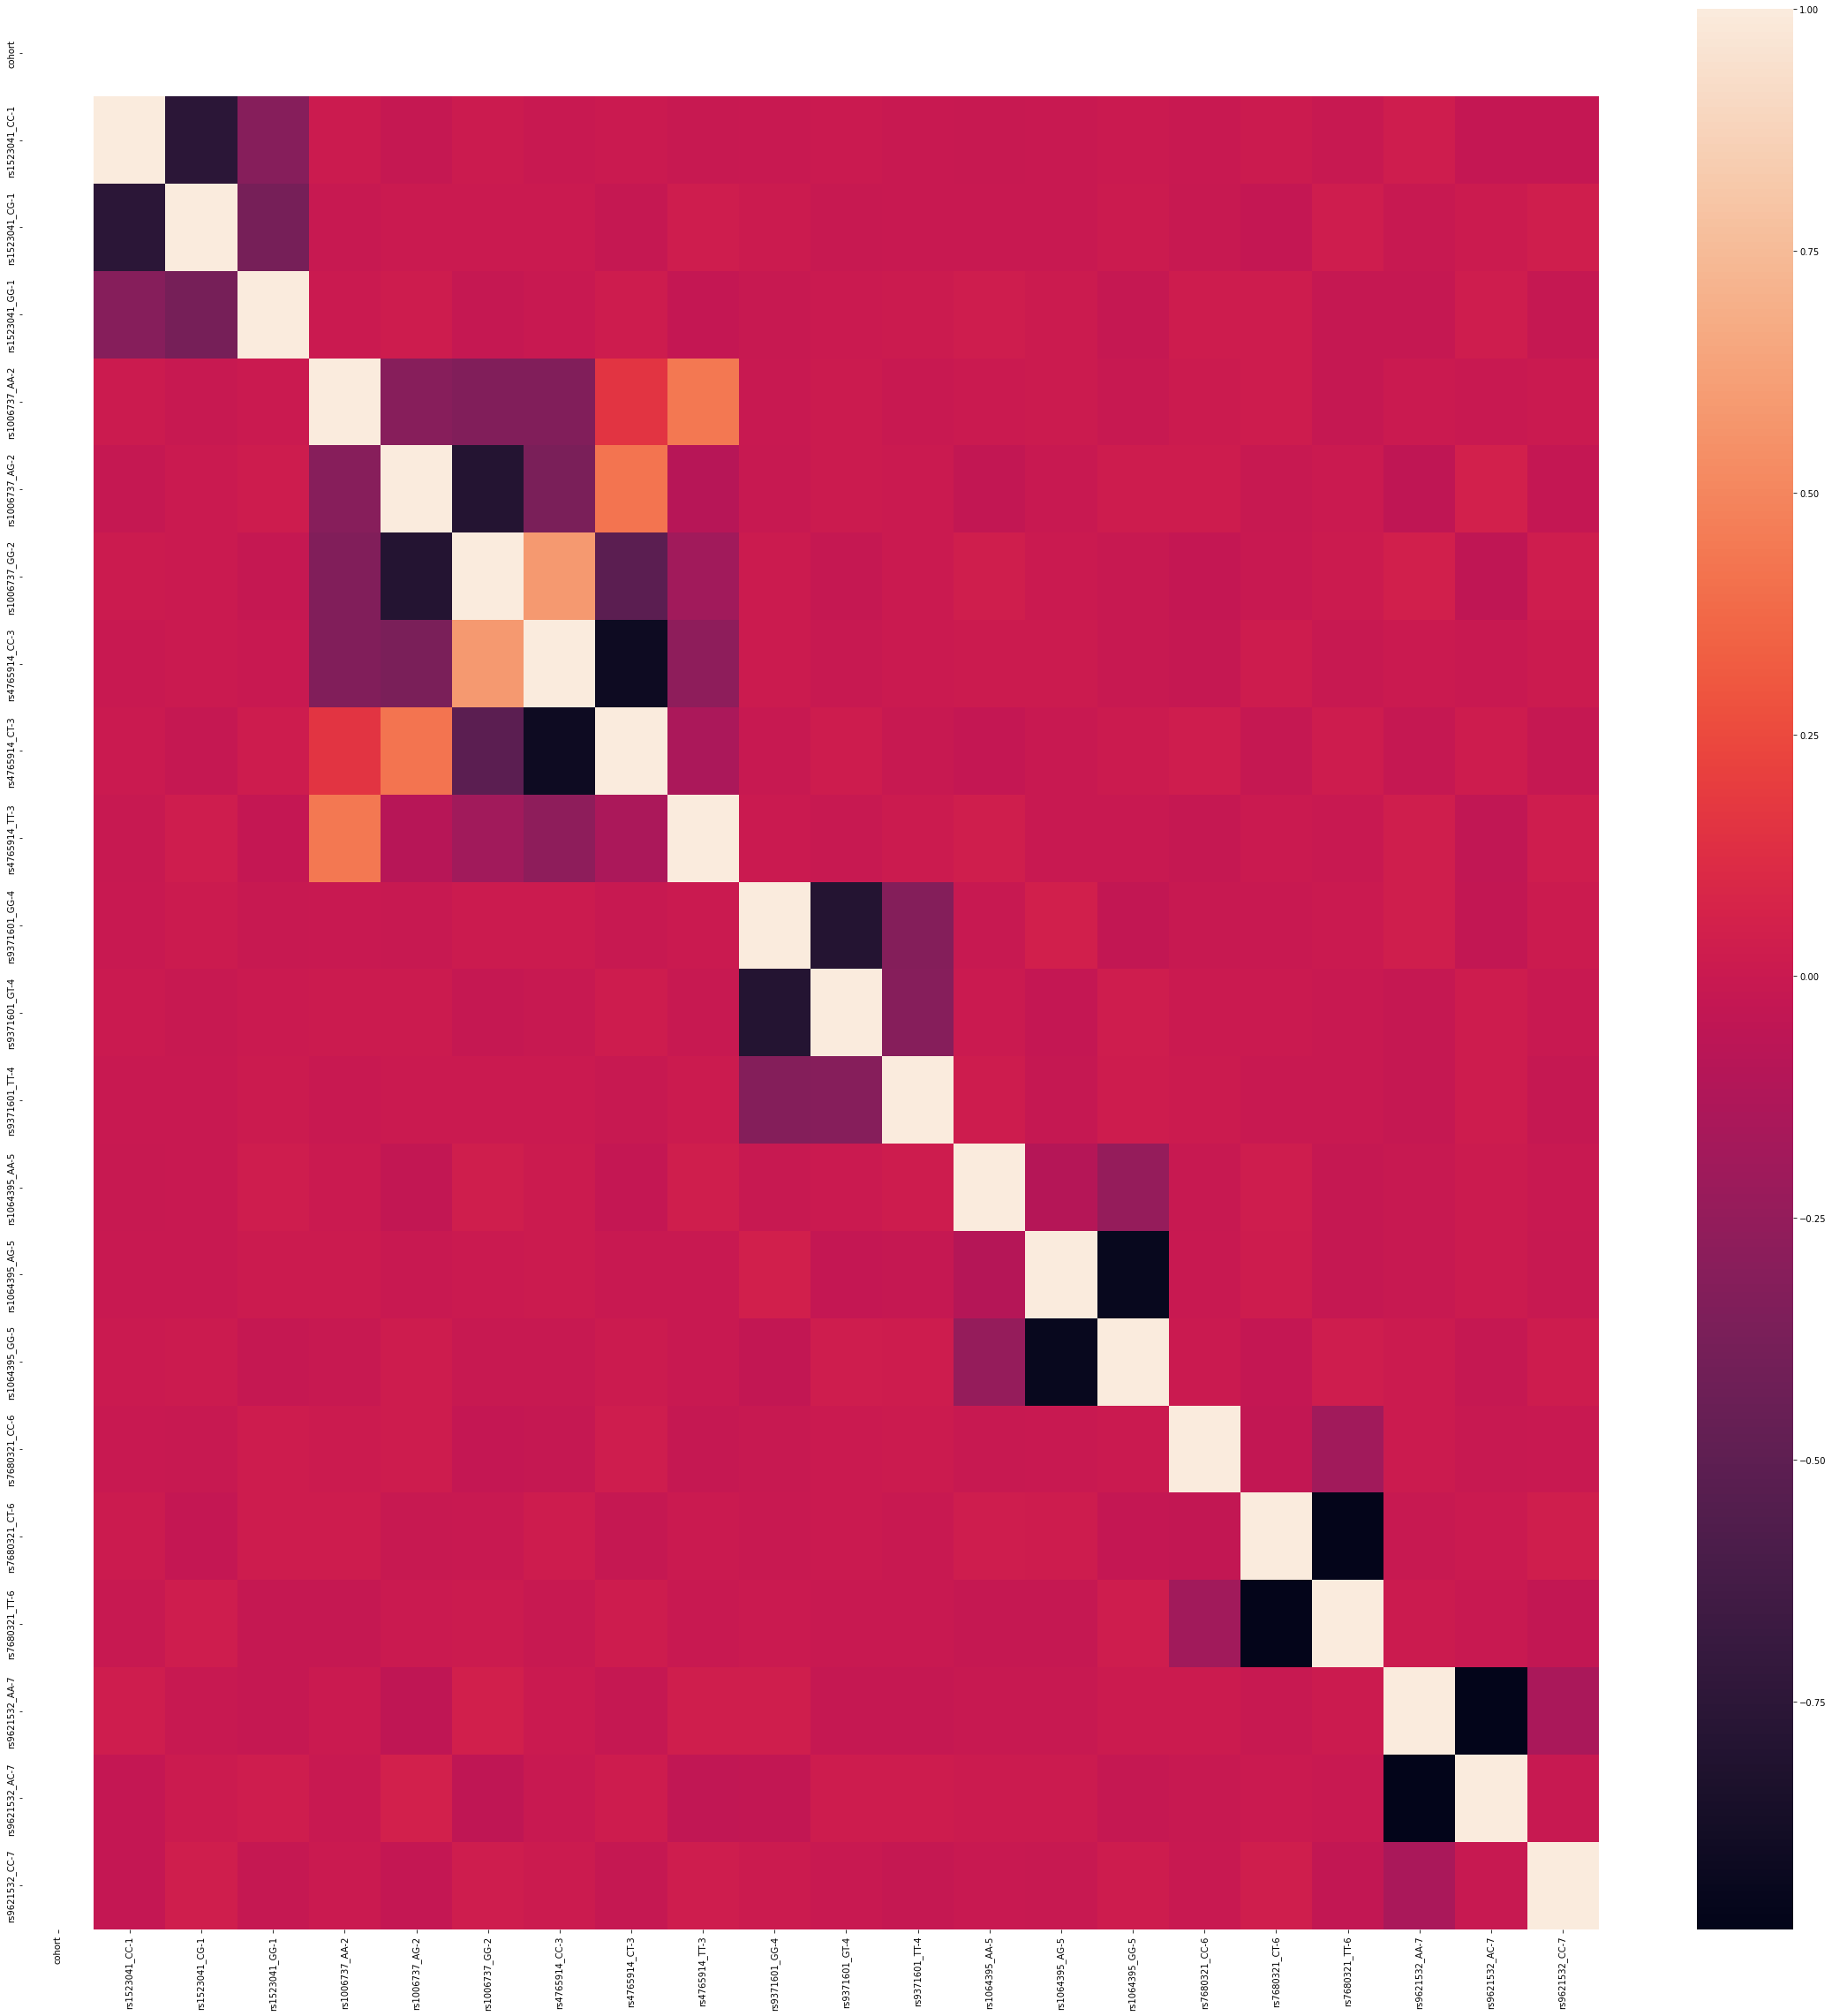

In [16]:
corrMatrix_case = dummy_dataset_case.corr()
plt.figure(figsize=(40,40))

sn.heatmap(corrMatrix_case)
plt.savefig('correlation_matrix_positives_case.png', facecolor='white', transparent=False)
plt.show()

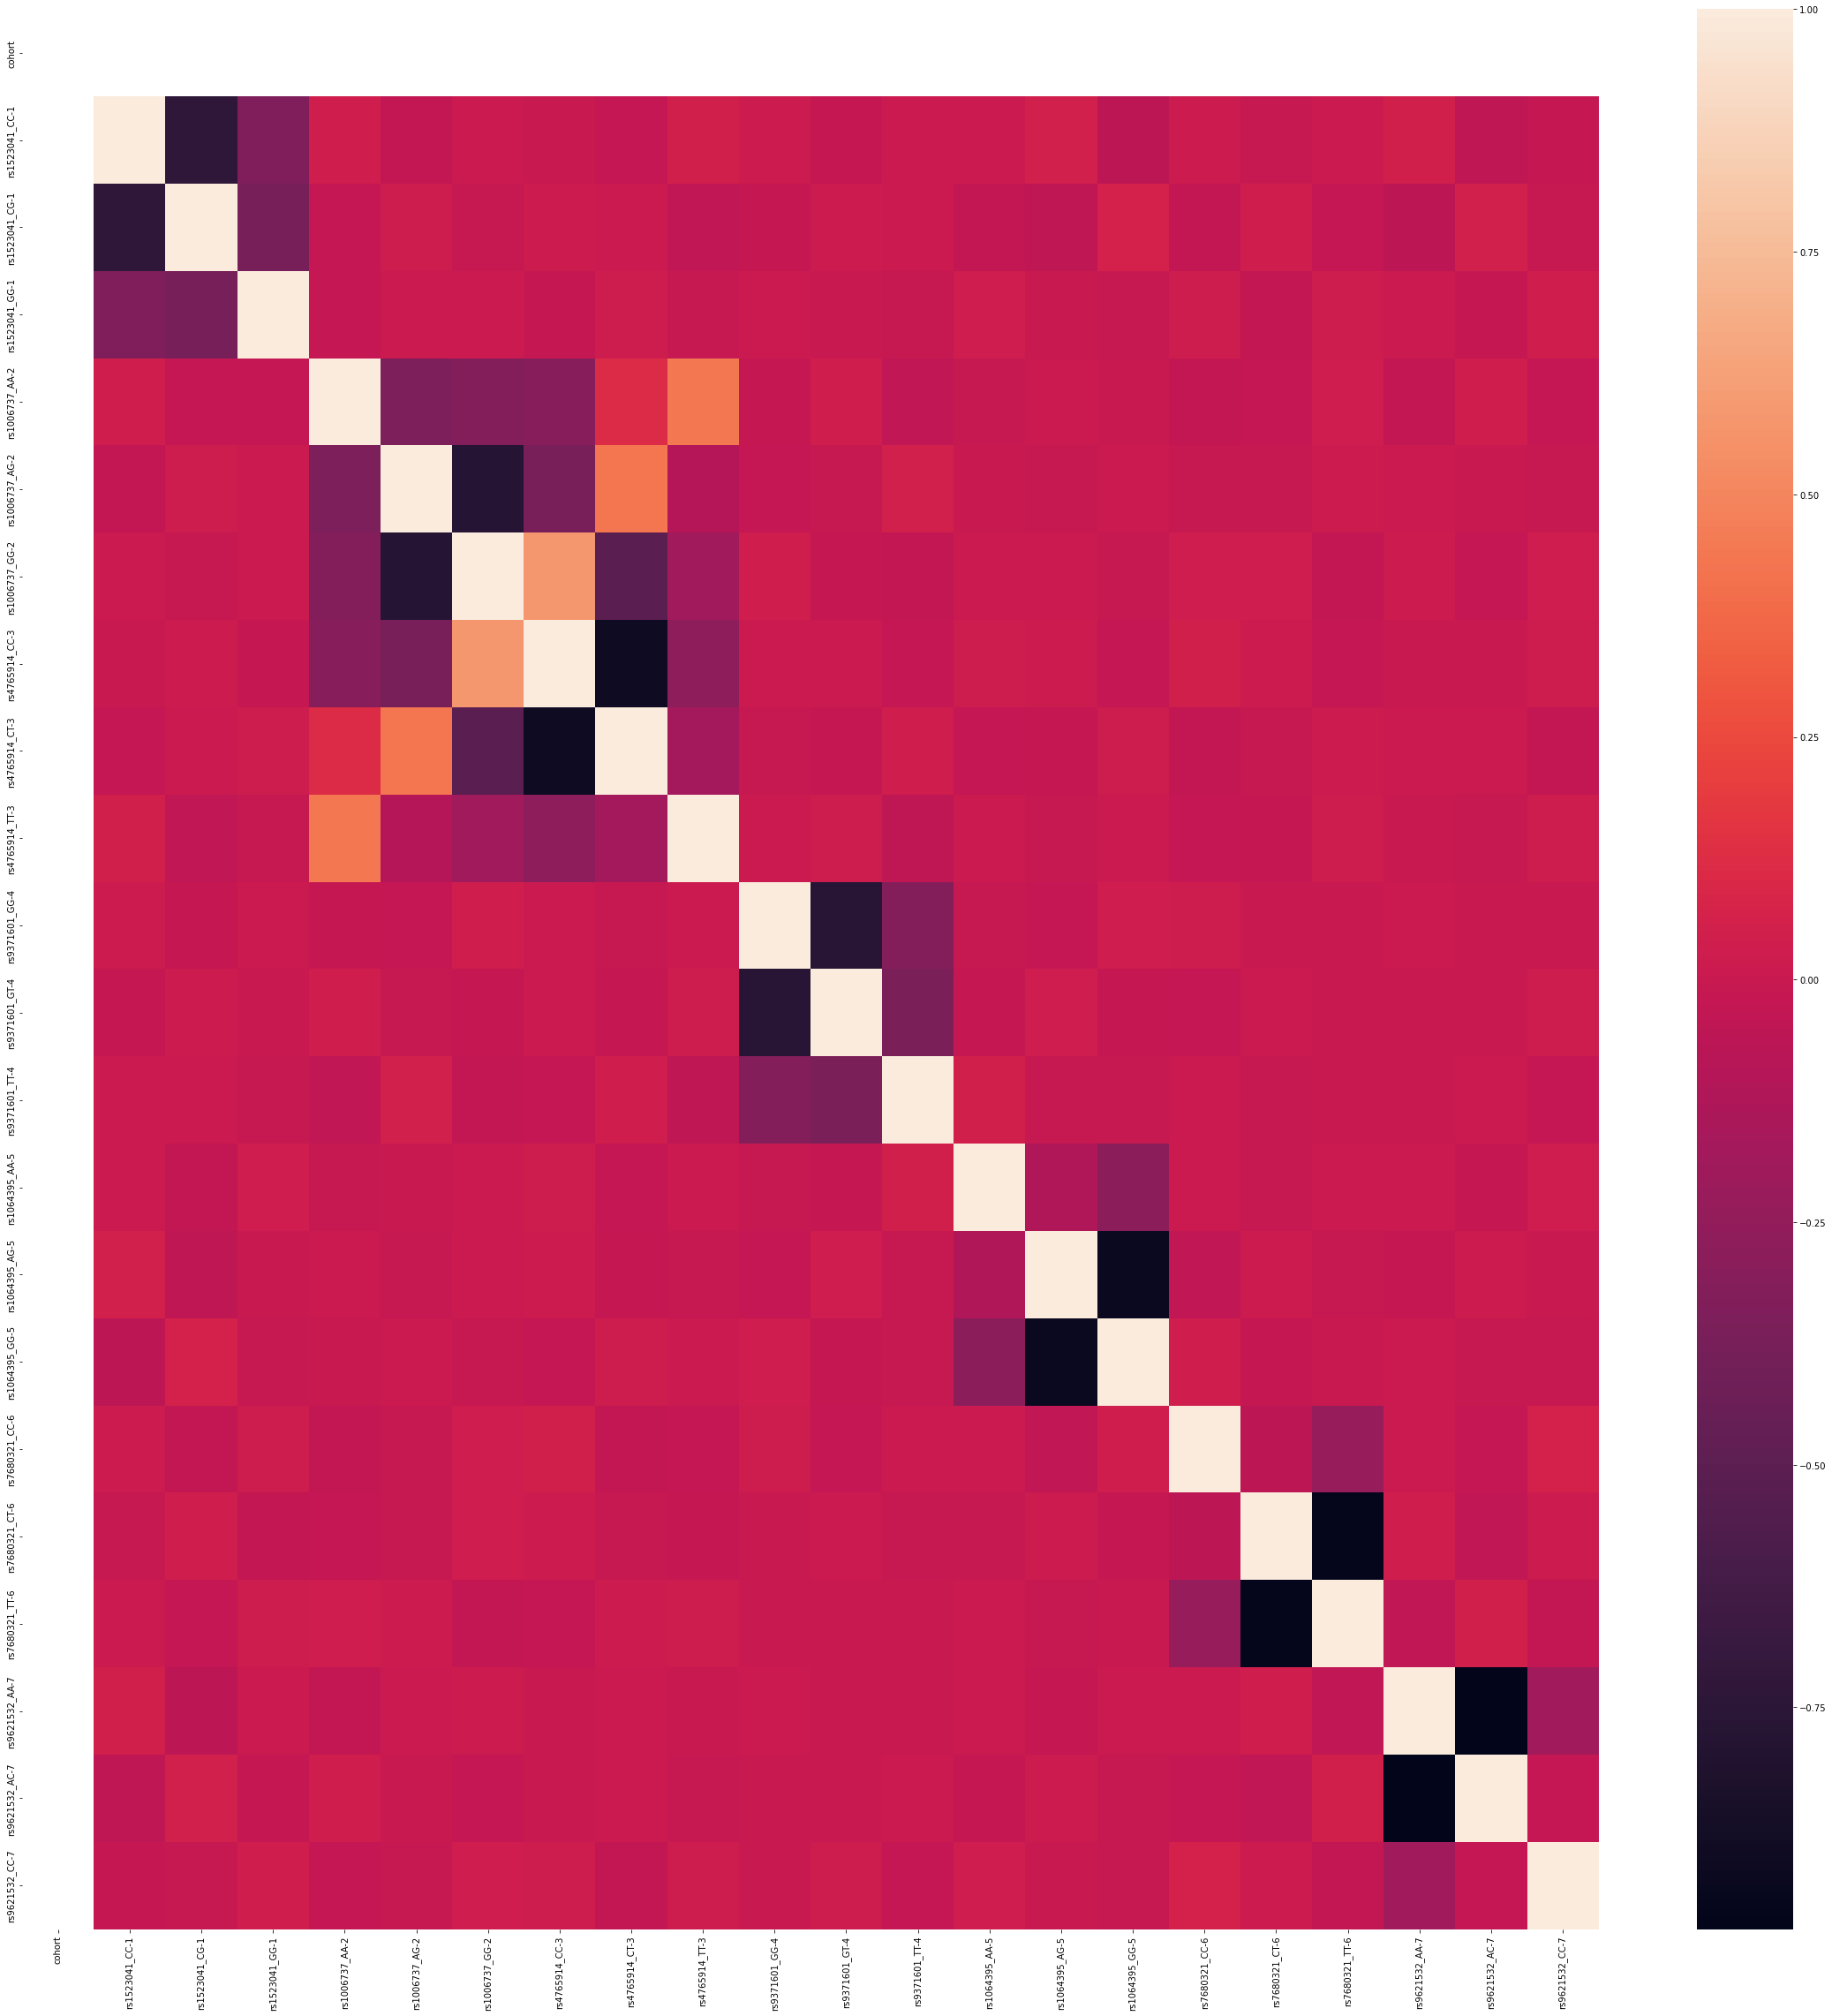

In [23]:
corrMatrix_control = dummy_dataset_control.corr()
plt.figure(figsize=(40,40))


sn.heatmap(corrMatrix_control)
plt.savefig('correlation_matrix_control.png', facecolor='white', transparent=False)
plt.show()

In [24]:
tuples_cases = []
test_sad_case = []
cohort_cases_tuples = []
rs1523041_CC1_tuples =[]
for i in range(0,len(corrMatrix_case.columns)):
    #tuples = [(x,y) for x,y in zip(corrMatrix.iloc[0].index, corrMatrix.iloc[i])]
    tuples_cases.append([(x,y) for x,y in zip(corrMatrix_case.iloc[0].index, corrMatrix_case.iloc[i])])

for a_tuple in tuples_cases:
    for i in range(0, len(tuples_cases)):
        cohort_cases_tuples.append(a_tuple[i])

for a_tuple in cohort_cases_tuples:
    test_sad_case.append(a_tuple[1])

print(test_sad_case)

[nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, 1.0, -0.7595823291976916, -0.3111908019799921, 0.008742903038393573, -0.016112882383987146, 0.010356431737021473, -0.0011620267045974067, 0.0067536118936855636, -0.013044006801911317, -0.004608918049135366, 0.007085355995913013, -0.0038505523215952033, -0.010160659220186979, -0.0011636007896767835, 0.0045896056140992516, -0.0022975959406428426, 0.01198887256609594, -0.011279656653168452, 0.028272870862049344, -0.024522025274582873, -0.02383087391601952, nan, -0.7595823291976916, 1.0, -0.38174156218951394, -0.013396457011500313, 0.003079802059366232, 0.005518317210111178, 0.004851219050988539, -0.017371427994593635, 0.029056120505845665, 0.013734912848499746, -0.011130396942594052, -0.004116722900166128, -0.00728105577121442, -0.005556292453800413, 0.00788765579110327, -0.009789448108593723, -0.02471470815233529, 0.026442189692613305, -0.013362491974792633, 0.0072953598763

In [25]:
tuples_controls = []
test_sad_controls = []
cohort_controls_tuples = []
rs1523041_CC1_tuples =[]
for i in range(0,len(corrMatrix_control.columns)):
    #tuples = [(x,y) for x,y in zip(corrMatrix.iloc[0].index, corrMatrix.iloc[i])]
    tuples_controls.append([(x,y) for x,y in zip(corrMatrix_control.iloc[0].index, corrMatrix_control.iloc[i])])

for a_tuple in tuples_controls:
    for i in range(0, len(tuples_controls)):
        cohort_controls_tuples.append(a_tuple[i])

for a_tuple in cohort_controls_tuples:
    test_sad_controls.append(a_tuple[1])

print(test_sad_case)

[nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, 1.0, -0.7595823291976916, -0.3111908019799921, 0.008742903038393573, -0.016112882383987146, 0.010356431737021473, -0.0011620267045974067, 0.0067536118936855636, -0.013044006801911317, -0.004608918049135366, 0.007085355995913013, -0.0038505523215952033, -0.010160659220186979, -0.0011636007896767835, 0.0045896056140992516, -0.0022975959406428426, 0.01198887256609594, -0.011279656653168452, 0.028272870862049344, -0.024522025274582873, -0.02383087391601952, nan, -0.7595823291976916, 1.0, -0.38174156218951394, -0.013396457011500313, 0.003079802059366232, 0.005518317210111178, 0.004851219050988539, -0.017371427994593635, 0.029056120505845665, 0.013734912848499746, -0.011130396942594052, -0.004116722900166128, -0.00728105577121442, -0.005556292453800413, 0.00788765579110327, -0.009789448108593723, -0.02471470815233529, 0.026442189692613305, -0.013362491974792633, 0.0072953598763

In [26]:
tuples_v2_case = []
for col in corrMatrix_case.columns:
    for i in range(0, len(corrMatrix_case.iloc[0].index)):
        tuples_v2_case.append((corrMatrix_case.iloc[0].index[i],col ))

tuples_v2_control = []
for col in corrMatrix_control.columns:
    for i in range(0, len(corrMatrix_control.iloc[0].index)):
        tuples_v2_control.append((corrMatrix_control.iloc[0].index[i],col ))

In [27]:
df_case = pd.DataFrame(index=range(len(tuples_v2_case)), columns=['correlation'])

df_case.index = tuples_v2_case
df_case['correlation'] = test_sad_case


cases_study = df_case.dropna()
cases_study

,correlation
"(rs1523041_CC-1, rs1523041_CC-1)",1.000000
"(rs1523041_CG-1, rs1523041_CC-1)",-0.759582
"(rs1523041_GG-1, rs1523041_CC-1)",-0.311191
"(rs1006737_AA-2, rs1523041_CC-1)",0.008743
"(rs1006737_AG-2, rs1523041_CC-1)",-0.016113
...,...
"(rs7680321_CT-6, rs9621532_CC-7)",0.038222
"(rs7680321_TT-6, rs9621532_CC-7)",-0.036722
"(rs9621532_AA-7, rs9621532_CC-7)",-0.155049
"(rs9621532_AC-7, rs9621532_CC-7)",-0.014856


In [28]:
df_control = pd.DataFrame(index=range(len(tuples_v2_control)), columns=['correlation'])

df_control.index = tuples_v2_control
df_control['correlation'] = test_sad_controls


control_study = df_control.dropna()
control_study

,correlation
"(rs1523041_CC-1, rs1523041_CC-1)",1.000000
"(rs1523041_CG-1, rs1523041_CC-1)",-0.738118
"(rs1523041_GG-1, rs1523041_CC-1)",-0.340272
"(rs1006737_AA-2, rs1523041_CC-1)",0.039785
"(rs1006737_AG-2, rs1523041_CC-1)",-0.029585
...,...
"(rs7680321_CT-6, rs9621532_CC-7)",0.011804
"(rs7680321_TT-6, rs9621532_CC-7)",-0.029526
"(rs9621532_AA-7, rs9621532_CC-7)",-0.185009
"(rs9621532_AC-7, rs9621532_CC-7)",-0.021264


In [29]:
cases_study[(cases_study['correlation'] > 0.5) & (cases_study['correlation'] < 1.0)]

,correlation
"(rs4765914_CC-3, rs1006737_GG-2)",0.581769
"(rs1006737_GG-2, rs4765914_CC-3)",0.581769


In [30]:
control = control_study[(control_study['correlation'] > 0.5) & (control_study['correlation'] < 1.0)]

control['correlation'].sort_values()

(rs4765914_CC-3, rs1006737_GG-2)    0.581903
(rs1006737_GG-2, rs4765914_CC-3)    0.581903
Name: correlation, dtype: float64

In [31]:
cases_neg = cases_study[(cases_study['correlation'] < -0.5) & (cases_study['correlation'] > -1.0)]
cases_neg['correlation'].sort_values()

(rs9621532_AC-7, rs9621532_AA-7)   -0.985495
(rs9621532_AA-7, rs9621532_AC-7)   -0.985495
(rs7680321_TT-6, rs7680321_CT-6)   -0.975623
(rs7680321_CT-6, rs7680321_TT-6)   -0.975623
(rs1064395_GG-5, rs1064395_AG-5)   -0.940934
(rs1064395_AG-5, rs1064395_GG-5)   -0.940934
(rs4765914_CT-3, rs4765914_CC-3)   -0.912130
(rs4765914_CC-3, rs4765914_CT-3)   -0.912130
(rs9371601_GT-4, rs9371601_GG-4)   -0.795436
(rs9371601_GG-4, rs9371601_GT-4)   -0.795436
(rs1006737_GG-2, rs1006737_AG-2)   -0.793477
(rs1006737_AG-2, rs1006737_GG-2)   -0.793477
(rs1523041_CG-1, rs1523041_CC-1)   -0.759582
(rs1523041_CC-1, rs1523041_CG-1)   -0.759582
(rs4765914_CT-3, rs1006737_GG-2)   -0.518497
(rs1006737_GG-2, rs4765914_CT-3)   -0.518497
Name: correlation, dtype: float64

In [32]:
control_neg = control_study[(control_study['correlation'] < -0.5) & (control_study['correlation'] > -1.0)]

control_neg['correlation'].sort_values()

(rs9621532_AC-7, rs9621532_AA-7)   -0.978581
(rs9621532_AA-7, rs9621532_AC-7)   -0.978581
(rs7680321_TT-6, rs7680321_CT-6)   -0.957782
(rs7680321_CT-6, rs7680321_TT-6)   -0.957782
(rs1064395_GG-5, rs1064395_AG-5)   -0.922343
(rs1064395_AG-5, rs1064395_GG-5)   -0.922343
(rs4765914_CT-3, rs4765914_CC-3)   -0.903457
(rs4765914_CC-3, rs4765914_CT-3)   -0.903457
(rs1006737_GG-2, rs1006737_AG-2)   -0.778701
(rs1006737_AG-2, rs1006737_GG-2)   -0.778701
(rs9371601_GT-4, rs9371601_GG-4)   -0.769756
(rs9371601_GG-4, rs9371601_GT-4)   -0.769756
(rs1523041_CG-1, rs1523041_CC-1)   -0.738118
(rs1523041_CC-1, rs1523041_CG-1)   -0.738118
(rs4765914_CT-3, rs1006737_GG-2)   -0.511575
(rs1006737_GG-2, rs4765914_CT-3)   -0.511575
Name: correlation, dtype: float64